In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
#plt.rcParams['figure.figsize']=17,8
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
plt.rcParams['figure.figsize'] = 10, 12
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df= pd.read_csv("C:/Users/kalya/Downloads/covid_19_india.csv")
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [4]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [5]:
df.drop(['ConfirmedIndianNational','ConfirmedForeignNational'],axis=1,inplace=True)

In [6]:
df.shape

(16850, 7)

# Let's See Whats the race between Recovered and Deaths

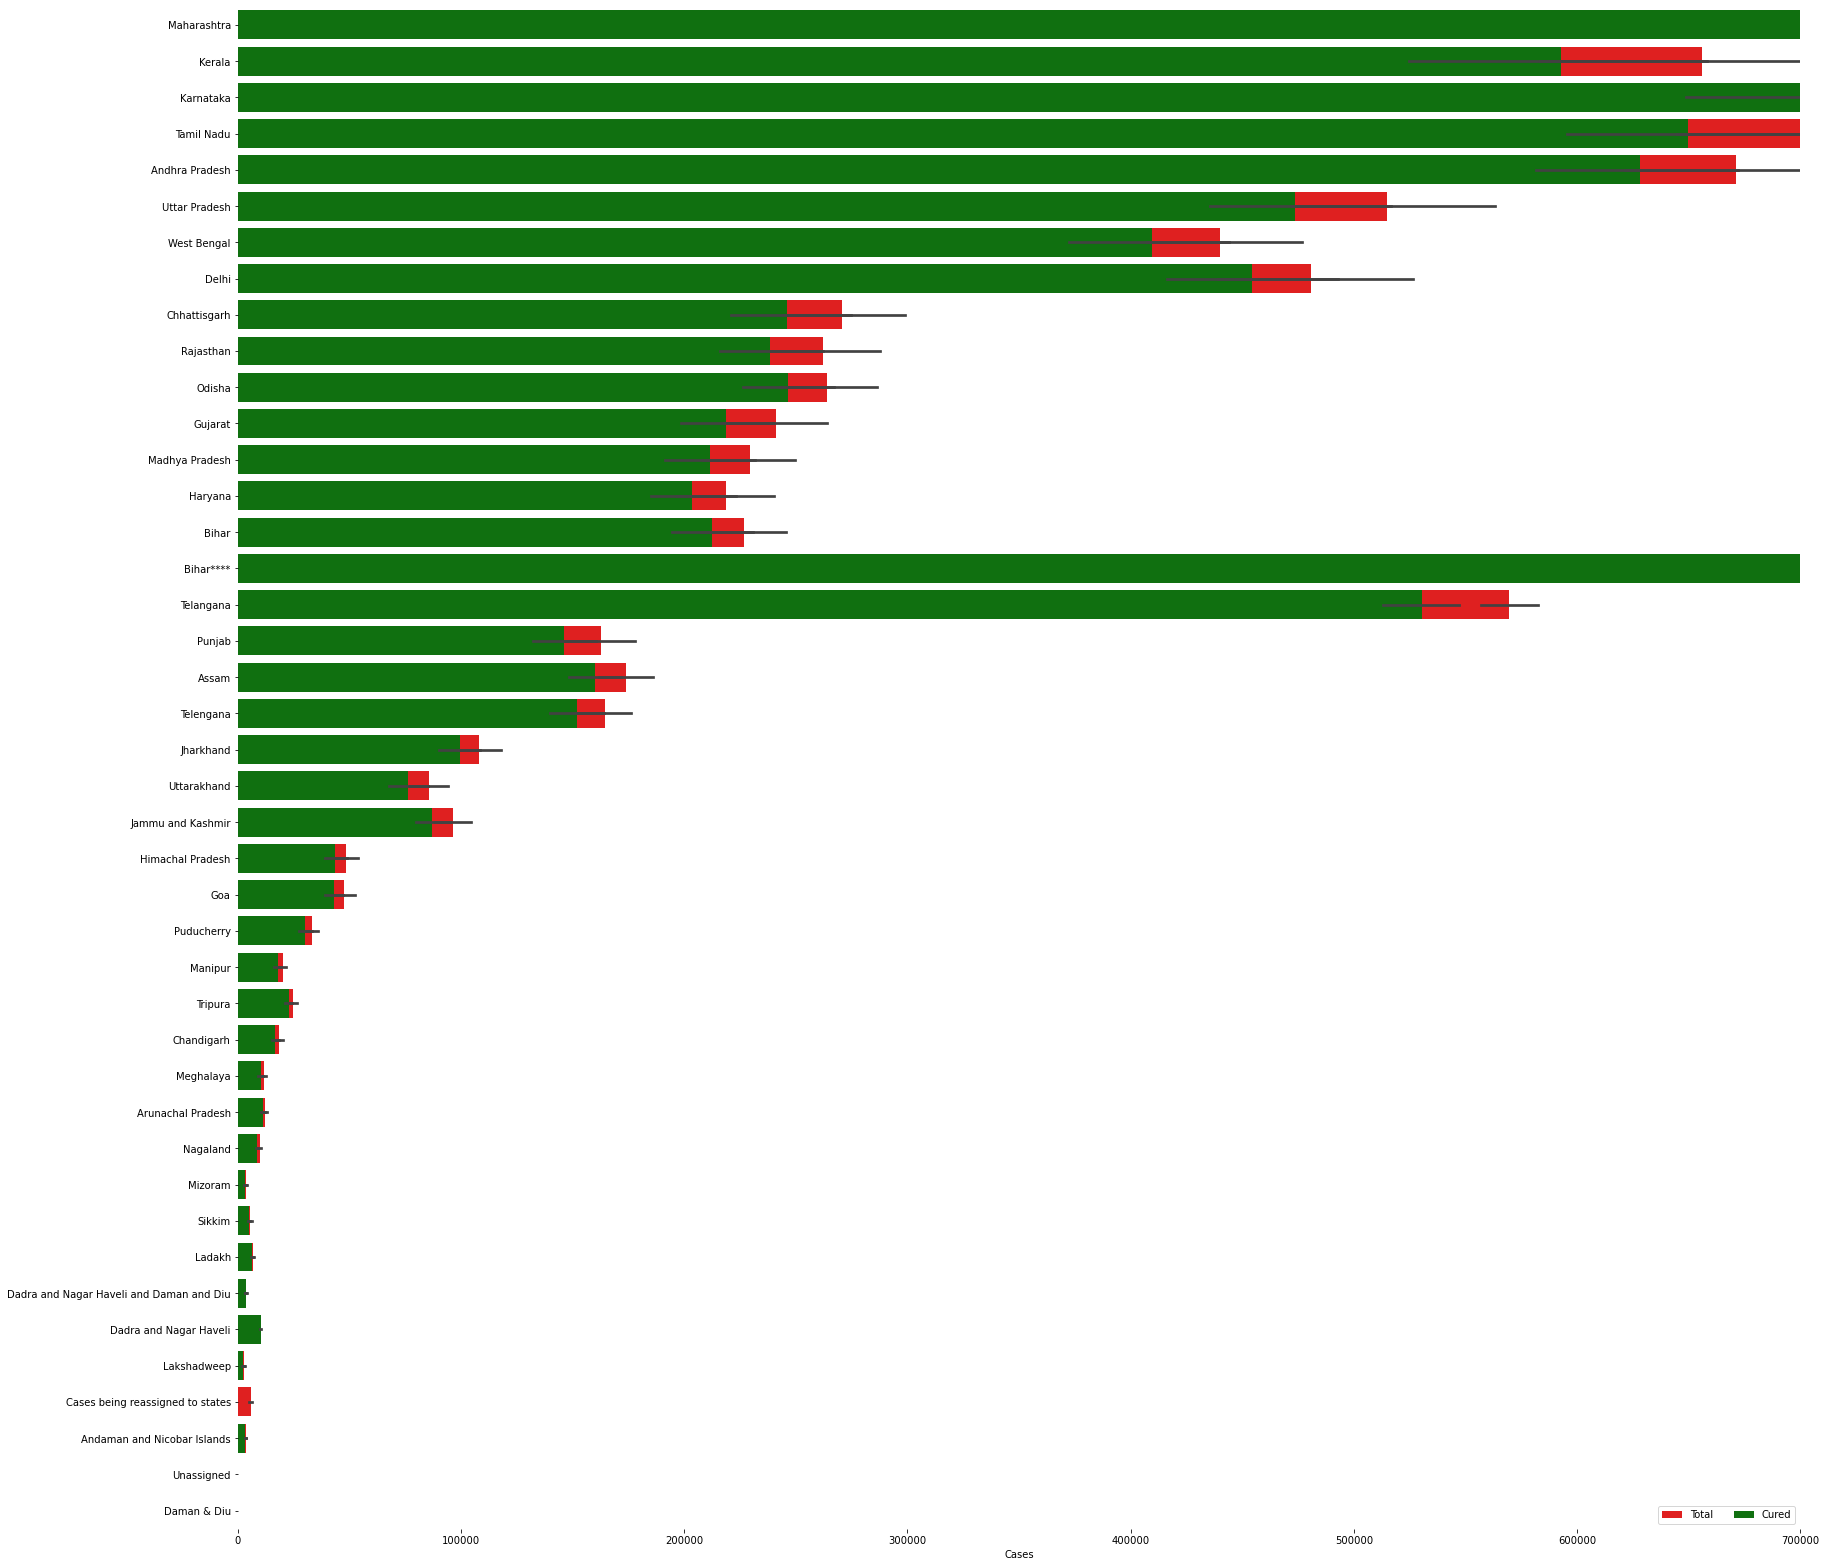

In [7]:
f, ax = plt.subplots(figsize=(28, 28))
data = df[['State/UnionTerritory','Confirmed','Cured','Deaths']]   
data.sort_values('Confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="State/UnionTerritory", data=data,label="Total", color="red")
sns.set_color_codes("muted")
sns.barplot(x="Cured", y="State/UnionTerritory", data=data, label="Cured", color="green")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 700000), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

In [8]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst = True)

# Check The Confirmed, Recovered and Death Trolls in India

In [9]:
df_confirmed_india=df.groupby('Date')['Confirmed'].sum().reset_index()
df_cured_india=df.groupby('Date')['Cured'].sum().reset_index()
df_death_india=df.groupby('Date')['Deaths'].sum().reset_index()

In [10]:
df_confirmed_india

,Date,Confirmed
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3
...,...,...
520,2021-07-03,30502362
521,2021-07-04,30545433
522,2021-07-05,30585229
523,2021-07-06,30619932


In [11]:
print("The Confirmed Cases are",df_confirmed_india.Confirmed.max())
print("The Recovered Cases are",df_cured_india.Cured.max())
print("The Deaths Cases are",df_death_india.Deaths.max())

The Confirmed Cases are 30663665
The Recovered Cases are 29799534
The Deaths Cases are 404211


# Let's See the Day-wise cases on India

#   Confirmed Day wise Cases

In [12]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_confirmed_india['Date'], y = df_confirmed_india['Confirmed'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()
# New COVID-19 cases reported daily in India
import plotly.express as px
fig = px.bar(df_confirmed_india, x="Date", y="Confirmed", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='gold')
fig.show()

# Deaths Day-Wise

In [13]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_death_india['Date'], y = df_death_india['Deaths'], mode='lines+markers',name='Total Deaths',line=dict(color='Red', width=2)))
fig.update_layout(title_text='Trend of Death Cases in India',plot_bgcolor='rgb(230, 230, 230)')
fig.show()
# New COVID-19 cases reported daily in India
import plotly.express as px
fig = px.bar(df_death_india, x="Date", y="Deaths", barmode='group', height=500)
fig.update_layout(title_text='Coronavirus Deaths in India on daily basis',plot_bgcolor='lime')
fig.show()


# Let's Do in One graph to see today-Wise Confirmed, Deaths and Cured cases

In [14]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_confirmed_india['Date'], y=df_confirmed_india['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=df_death_india['Date'], y=df_death_india['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=df_cured_india['Date'], y=df_cured_india['Cured'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='India COVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))
fig.show()

# Let's Now Analyze State-Wise Cases and Recovery

In [15]:
import numpy as np
state_cases = df.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()
state_cases['Active'] = state_cases['Confirmed'] - (state_cases['Deaths']+ state_cases['Cured'])
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured"]/state_cases["Confirmed"],2)

In [16]:
state_cases

,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
0,Andaman and Nicobar Islands,7487,128,7343,16,1.71,98.08
1,Andhra Pradesh,1908065,12898,1861937,33230,0.68,97.58
2,Arunachal Pradesh,37879,181,34525,3173,0.48,91.15
3,Assam,522267,4717,493306,24244,0.90,94.45
4,Bihar,722746,9612,711913,1221,1.33,98.50
5,Bihar****,715730,9452,701234,5044,1.32,97.97
6,Cases being reassigned to states,9265,0,0,9265,0.00,0.00
7,Chandigarh,61752,809,60837,106,1.31,98.52
8,Chhattisgarh,996359,13462,977893,5004,1.35,98.15
9,Dadra and Nagar Haveli,10377,4,10261,112,0.04,98.88


In [17]:
state_cases.head()

,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
0,Andaman and Nicobar Islands,7487,128,7343,16,1.71,98.08
1,Andhra Pradesh,1908065,12898,1861937,33230,0.68,97.58
2,Arunachal Pradesh,37879,181,34525,3173,0.48,91.15
3,Assam,522267,4717,493306,24244,0.90,94.45
4,Bihar,722746,9612,711913,1221,1.33,98.50


In [18]:
state_cases['State/UnionTerritory'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Bihar****',
       'Cases being reassigned to states', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli',
       'Dadra and Nagar Haveli and Daman and Diu', 'Daman & Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Telengana', 'Tripura', 'Unassigned', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [19]:
state_cases['State/UnionTerritory'].nunique()

42

## Here we have got that we have the data if around 40 States and Union Territories

# Now let's Analyze the Confirmed,Recovered and Deaths on Each State

In [20]:
state_wise_cases=state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Cured"])\
                        .background_gradient(cmap='Oranges',subset=["Active"])\
                        .background_gradient(cmap='RdYlBu',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Accent',subset=["Cure Rate (per 100)"])

In [21]:
state_wise_cases

,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
24,Maharashtra,6113335,123531,5872268,117536,2.020000,96.060000
20,Kerala,2996094,13960,2877557,104577,0.470000,96.040000
19,Karnataka,2859595,35526,2784030,40039,1.240000,97.360000
34,Tamil Nadu,2503481,33132,2435872,34477,1.320000,97.300000
1,Andhra Pradesh,1908065,12898,1861937,33230,0.680000,97.580000
39,Uttar Pradesh,1706818,22656,1682130,2032,1.330000,98.550000
41,West Bengal,1507241,17834,1472132,17275,1.180000,97.670000
12,Delhi,1434687,25001,1408853,833,1.740000,98.200000
8,Chhattisgarh,996359,13462,977893,5004,1.350000,98.150000
32,Rajasthan,952836,8942,942882,1012,0.940000,98.960000


# In the Next cell we'll see this in a better visualization


# Which states are more affected by the virus?

In [22]:
px.treemap(state_cases,path=["State/UnionTerritory"],values="Deaths",title="Overall States Comparision of deaths")

# Let's Check the Fatality Ratio

In [23]:
df['Fatality-Ratio'] = df['Deaths']/df['Confirmed']

In [24]:
df['Fatality-Ratio']

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
16845    0.005894
16846    0.010217
16847    0.021527
16848    0.013274
16849    0.011832
Name: Fatality-Ratio, Length: 16850, dtype: float64

# FATALITY_RATIO AMONG STATES

In [25]:
fatality_ratio=df.groupby('State/UnionTerritory')['Fatality-Ratio'].sum().reset_index()
fatality_ratio.iplot(kind='line',mode='lines+markers',x='State/UnionTerritory',y='Fatality-Ratio',title='Fatality-Ratio Among States',color='blue')


# FATALITY RATIO IN AN YEAR

In [26]:
fatality_year=df.groupby('Date')['Fatality-Ratio'].sum().reset_index()
fatality_year.iplot(kind='line',x='Date',y='Fatality-Ratio')


# Top 10 States With Highest Confirmed Cases


In [27]:
# Top 10 states with maximum number of COnfirmed Cases
top_10=state_cases.groupby('State/UnionTerritory')['Confirmed'].max().sort_values(ascending=False).reset_index()
trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["State/UnionTerritory","Confirmed Cases"],
                fill = dict(color = '#119DFF'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[top_10['State/UnionTerritory'].head(10),top_10['Confirmed'].head(10)],
               fill = dict(color = ['#25FEFD', 'white']),
               align = ['center'],height=20))

trace1 = go.Bar(x=top_10['State/UnionTerritory'].head(10),
                y=top_10['Confirmed'].head(10),
                xaxis='x1',
                yaxis='y1',
                marker=dict(color='blue'),opacity=0.60)
layout = dict(
    width=1000,
    height=400,
    autosize=False,
    title='Top-10 States with Highest No. of Cases',
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.58, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)
fig1 = dict(data=[trace, trace1], layout=layout)
iplot(fig1)

# Top 10 States in Highest Recovery


In [28]:
# Top 10 states with maximum number of Recovery
top_10=state_cases.groupby('State/UnionTerritory')['Cured'].max().sort_values(ascending=False).reset_index()
trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["State/UnionTerritory","Cured Cases"],
                fill = dict(color = '#119DFF'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[top_10['State/UnionTerritory'].head(10),top_10['Cured'].head(10)],
               fill = dict(color = ['lime', 'white']),
               align = ['center'],height=20))

trace1 = go.Bar(x=top_10['State/UnionTerritory'].head(10),
                y=top_10['Cured'].head(10),
                xaxis='x1',
                yaxis='y1',
                marker=dict(color='lime'),opacity=1.00)
layout = dict(
    width=1000,
    height=400,
    autosize=False,
    title='Top-10 States with Highest Recovery',
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.58, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)
fig1 = dict(data=[trace, trace1], layout=layout)
iplot(fig1)

# Top 10 states with maximum number of Recovery

In [29]:
# Top 10 states with maximum number of Deaths
top_10=state_cases.groupby('State/UnionTerritory')['Deaths'].max().sort_values(ascending=False).reset_index()
trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["State/UnionTerritory","Deaths Cases"],
                fill = dict(color = '#119DFF'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[top_10['State/UnionTerritory'].head(10),top_10['Deaths'].head(10)],
               fill = dict(color = ['darksalmon', 'white']),
               align = ['center'],height=20))

trace1 = go.Bar(x=top_10['State/UnionTerritory'].head(10),
                y=top_10['Deaths'].head(10),
                xaxis='x1',
                yaxis='y1',
                marker=dict(color='darkred'),opacity=0.70)
layout = dict(
    width=1000,
    height=400,
    autosize=False,
    title='Top-10 States with Highest No. of Cases',
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.58, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)
fig1 = dict(data=[trace, trace1], layout=layout)
iplot(fig1)

# Testing Details

In [30]:
df_testing=pd.read_csv("C:/Users/kalya/Downloads/StatewiseTestingDetails.csv")

In [31]:
df_testing.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [32]:
# States with Total Sample collections
df_sample=df_testing.groupby('State')['TotalSamples'].max().sort_values(ascending=False).reset_index()

In [33]:
df_sample.head()

,State,TotalSamples
0,Uttar Pradesh,59331655.0
1,Maharashtra,42908288.0
2,Karnataka,35152131.0
3,Bihar,33875754.0
4,Tamil Nadu,33789460.0


In [34]:
# Top 10 states with Total Sample Collections
px.bar(df_sample.head(10),x='State',y='TotalSamples')


In [35]:
df_positive=df_testing.groupby('State')['Positive'].max().sort_values(ascending=False).reset_index()

# Positive Cases


# What is the number of positive cases rising in India?


In [36]:
df_positive.head(10).iplot(kind='bar',x='State',y='Positive')


In [37]:
df_vaccine=pd.read_csv('C:/Users/kalya/Downloads/covid_vaccine_statewise.csv')

In [38]:
df_vaccine.head()

,Updated On,State,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0


In [39]:
df_vaccine.columns

Index(['Updated On', 'State', 'Total Doses Administered',
       'Total Sessions Conducted', 'Total Sites ', 'First Dose Administered',
       'Second Dose Administered', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total Covaxin Administered', 'Total CoviShield Administered',
       'Total Sputnik V Administered', 'AEFI', '18-45 years (Age)',
       '45-60 years (Age)', '60+ years (Age)', 'Total Individuals Vaccinated'],
      dtype='object')

In [40]:
male = df_vaccine["Male(Individuals Vaccinated)"].max() 
female = df_vaccine["Female(Individuals Vaccinated)"].max()  
trans = df_vaccine["Transgender(Individuals Vaccinated)"].max()
px.pie(names=["Male Vaccinated","Female Vaccinated","Trans Gender"],values=[male,female,trans],title="Male and Female Vaccinated ratio for Covid19")


In [41]:
Covaxin = df_vaccine["Total Covaxin Administered"].max() 
Covishield = df_vaccine["Total CoviShield Administered"].max()  
px.pie(names=["Covishield Vaccinated","Covaxin Vaccinated"],values=[Covaxin,Covishield],title="Covaxin and Covishield Vaccination")

In [42]:
df_vaccine.head()

,Updated On,State,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0


In [43]:
Doses = df_vaccine["Total Doses Administered"].max() 
Vaccinated = df_vaccine["Total Individuals Vaccinated"].max()  
px.pie(names=["Doses Administered","People Vaccinated"],values=[Doses,Vaccinated],title="Doses administered vs People Vaccinated")

In [44]:
df_vaccine.head()

,Updated On,State,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0


In [45]:
df_vaccine['State'].unique()

array(['India', 'Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

# Let's Analyze 3 States of How many People gets Vaccinated

# Telangana, Andhra Pradesh, Maharashtra

In [46]:
df_Telangana=df_vaccine[df_vaccine['State']=='Telangana']
df_Andhra_Pradesh=df_vaccine[df_vaccine['State']=='Andhra Pradesh']
df_Maharashtra=df_vaccine[df_vaccine['State']=='Maharashtra']

In [47]:
Doses = df_Telangana["Total Doses Administered"].max() 
Vaccinated = df_Telangana["Total Individuals Vaccinated"].max() 
px.pie(names=["Doses Administered","People Vaccinated"],values=[Doses,Vaccinated],title="Doses administered vs People Vaccinated")

In [48]:
Doses = df_Andhra_Pradesh["Total Doses Administered"].max() 
Vaccinated = df_Andhra_Pradesh["Total Individuals Vaccinated"].max()  
px.pie(names=["Doses Administered","People Vaccinated"],values=[Doses,Vaccinated],title="Doses administered vs People Vaccinated")

In [49]:
Doses = df_Maharashtra["Total Doses Administered"].max()
Vaccinated = df_Maharashtra["Total Individuals Vaccinated"].max() 
px.pie(names=["Doses Administered","People Vaccinated"],values=[Doses,Vaccinated],title="Doses administered vs People Vaccinated")

In [50]:
df_Telangana.iplot(kind='bar',x='Updated On',y='Total Individuals Vaccinated')

# Let's Predict The Upcoming Cases and Deaths on India

In [51]:
df_confirmed_india.columns = ['ds','y']
df_confirmed_india['ds'] = pd.to_datetime(df_confirmed_india['ds'])

In [52]:
df_confirmed_india

,ds,y
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3
...,...,...
520,2021-07-03,30502362
521,2021-07-04,30545433
522,2021-07-05,30585229
523,2021-07-06,30619932


In [53]:
from fbprophet import Prophet

In [54]:
m = Prophet()
m.fit(df_confirmed_india)
future = m.make_future_dataframe(periods=21)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
541,2021-07-24
542,2021-07-25
543,2021-07-26
544,2021-07-27
545,2021-07-28


In [56]:
forecast=m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
541,2021-07-24,3.748326e+07,3.647558e+07,3.837956e+07,3.738399e+07,3.762384e+07,8315.713759,8315.713759,8315.713759,8315.713759,8315.713759,8315.713759,0.0,0.0,0.0,3.749157e+07
542,2021-07-25,3.769743e+07,3.675842e+07,3.865872e+07,3.758422e+07,3.785294e+07,3939.171059,3939.171059,3939.171059,3939.171059,3939.171059,3939.171059,0.0,0.0,0.0,3.770137e+07
543,2021-07-26,3.791161e+07,3.701580e+07,3.881172e+07,3.777436e+07,3.808391e+07,-2845.815881,-2845.815881,-2845.815881,-2845.815881,-2845.815881,-2845.815881,0.0,0.0,0.0,3.790876e+07
544,2021-07-27,3.812578e+07,3.715764e+07,3.898238e+07,3.797247e+07,3.831738e+07,-15605.461797,-15605.461797,-15605.461797,-15605.461797,-15605.461797,-15605.461797,0.0,0.0,0.0,3.811018e+07
545,2021-07-28,3.833996e+07,3.743091e+07,3.931891e+07,3.816444e+07,3.855254e+07,-22435.750871,-22435.750871,-22435.750871,-22435.750871,-22435.750871,-22435.750871,0.0,0.0,0.0,3.831752e+07


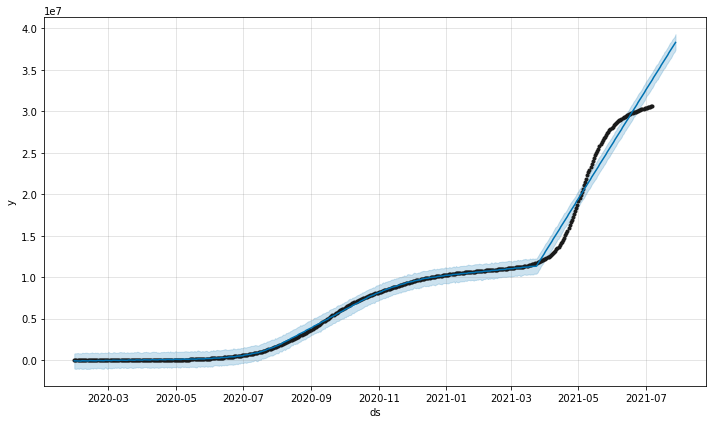

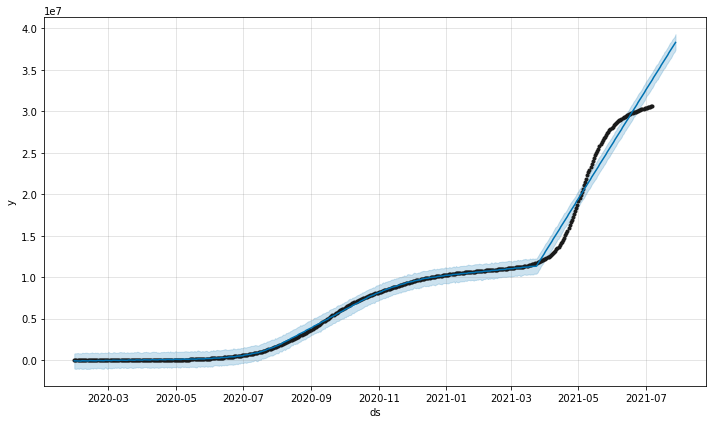

In [57]:
m.plot(forecast)

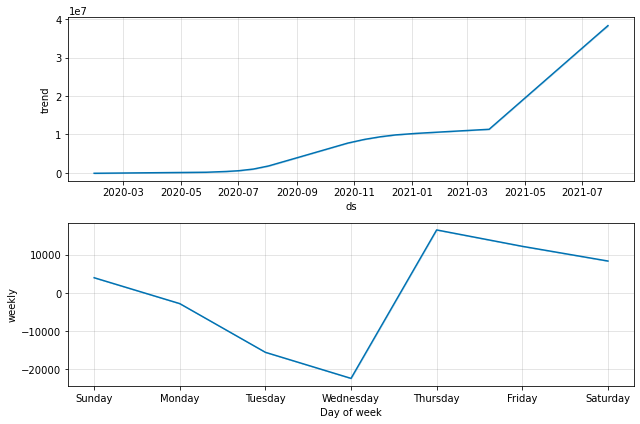

In [58]:
confirmed_forecast_plot=m.plot_components(forecast)

# Let's Predict the Deaths in India

In [59]:
df_death_india.columns=["ds","y"]
df_death_india["ds"]=pd.to_datetime(df_death_india["ds"])

In [60]:
df_death_india

,ds,y
0,2020-01-30,0
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,0
4,2020-02-03,0
...,...,...
520,2021-07-03,401050
521,2021-07-04,402005
522,2021-07-05,402728
523,2021-07-06,403281


In [61]:
model=Prophet()
model.fit(df_death_india)
future=model.make_future_dataframe(periods=14)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
534,2021-07-17
535,2021-07-18
536,2021-07-19
537,2021-07-20
538,2021-07-21


In [62]:
prediction=model.predict(future)
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
534,2021-07-17,443094.523555,432317.800983,453143.888406,442488.769976,443694.762717,62.921569,62.921569,62.921569,62.921569,62.921569,62.921569,0.0,0.0,0.0,443157.445124
535,2021-07-18,445754.422662,435914.083913,455910.460966,444965.762283,446564.285714,32.786758,32.786758,32.786758,32.786758,32.786758,32.786758,0.0,0.0,0.0,445787.209420
536,2021-07-19,448414.321770,437818.337683,458409.709825,447407.865065,449395.868480,-16.143219,-16.143219,-16.143219,-16.143219,-16.143219,-16.143219,0.0,0.0,0.0,448398.178551
537,2021-07-20,451074.220877,440523.167616,461121.072227,449875.346879,452319.497590,-117.965584,-117.965584,-117.965584,-117.965584,-117.965584,-117.965584,0.0,0.0,0.0,450956.255293
538,2021-07-21,453734.119984,442657.850687,464292.716039,452278.151741,455217.664587,-110.024309,-110.024309,-110.024309,-110.024309,-110.024309,-110.024309,0.0,0.0,0.0,453624.095675


<AxesSubplot:>

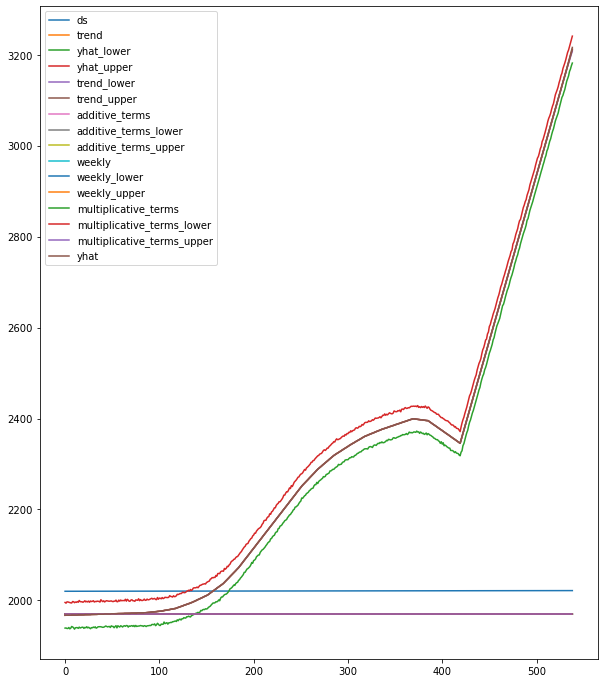

In [63]:
prediction.plot()

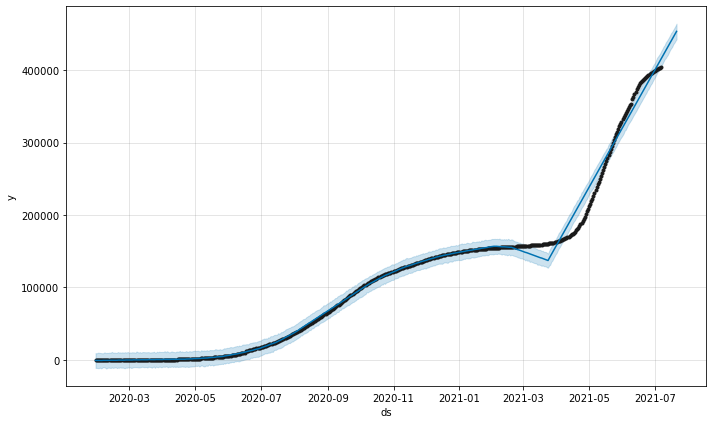

In [64]:
death_forecast_plot=model.plot(prediction)

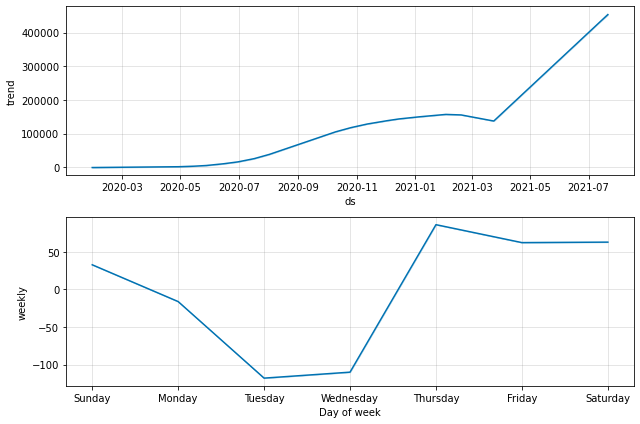

In [65]:
 deaths_forecast_plot=model.plot_components(prediction)

# Thankyou.! Stay Home Stay Safe